In [1]:
import pandas as pd
import numpy as np
import spacy
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd drive/MyDrive/Lab4/

/content/drive/MyDrive/Lab4


### Obtencion de datos

In [4]:
data = pd.read_csv('./input/training.csv', header = None, names = ['sk_id', 'tweet_number', 'date', 'query', 'user', 'content'], encoding = "ISO-8859-1")
data.head()

,sk_id,tweet_number,date,query,user,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.shape

(1600000, 6)

### Top users

In [6]:
def getTweetId(tweet):
    pattern = r'(@\w+)'
    match = re.findall(pattern, tweet)
    if len(match) > 0:
      return ' '.join(match)
    else:
      return 'Undefined'

In [7]:
data['tweet_id'] = data.apply(lambda row: getTweetId(row['content']), axis = 1)

In [8]:
data.head()

,sk_id,tweet_number,date,query,user,content,tweet_id
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",@switchfoot
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Undefined
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Undefined
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",@nationwideclass


In [9]:
print(data['tweet_id'].value_counts()[0:4])
top_users = list(data['tweet_id'].value_counts()[1:4].index)
top_users

Undefined      861507
@mileycyrus      4145
@tommcfly        3608
@ddlovato        3109
Name: tweet_id, dtype: int64


['@mileycyrus', '@tommcfly', '@ddlovato']

### Corpus

In [10]:
data['timestamp'] =  pd.to_datetime(data['date'], format = '%a %b %d %H:%M:%S PDT %Y')
data['tweet_length'] = data['content'].str.len()
data.head()

,sk_id,tweet_number,date,query,user,content,tweet_id,timestamp,tweet_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",@switchfoot,2009-04-06 22:19:45,115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Undefined,2009-04-06 22:19:49,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan,2009-04-06 22:19:53,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Undefined,2009-04-06 22:19:57,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",@nationwideclass,2009-04-06 22:19:57,111


In [11]:
#top1_corpus = data.loc[data['tweet_id'].str.contains(top_users[0]), ['tweet_id', 'timestamp', 'content', 'tweet_length']].copy().reset_index(drop = True)
corpus1 = data.loc[data['tweet_id'] == top_users[0], ['tweet_id', 'timestamp', 'content', 'tweet_length']].copy().reset_index(drop = True)
corpus2 = data.loc[data['tweet_id'] == top_users[1], ['tweet_id', 'timestamp', 'content', 'tweet_length']].copy().reset_index(drop = True)
corpus3 = data.loc[data['tweet_id'] == top_users[2], ['tweet_id', 'timestamp', 'content', 'tweet_length']].copy().reset_index(drop = True)

In [12]:
corpus1.head()

,tweet_id,timestamp,content,tweet_length
0,@mileycyrus,2009-04-06 23:30:57,@mileycyrus hahaha dont be like that one time ...,107
1,@mileycyrus,2009-04-07 00:45:20,"@mileycyrus i have the same problem, but it's ...",137
2,@mileycyrus,2009-04-07 00:49:07,@mileycyrus I guess counting sheep didn't work...,72
3,@mileycyrus,2009-04-07 00:49:44,@mileycyrus I would too if it meant spending a...,100
4,@mileycyrus,2009-04-07 00:56:41,@mileycyrus AWWW u seriously have the cutest d...,112


### NLP

In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
def normalizar(doc):
    txt = re.sub(r'[^@A-z0-9\s{1}áéíóúüñÁÉÍÓÚÜ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n')
    txt = re.sub(r' {2}', ' ', txt)
    return txt

In [15]:
def tokenizar(doc):
    return nlp(doc)

In [16]:
def removeStopWords(doc):
    #all_stopwords = nlp.Defaults.stop_words
    #tokens = [token for token in doc if not token.text in all_stopwords]
    tokens = [token for token in doc if not token.is_stop]
    return tokens

In [17]:
def stemmingLemmating(tokens):
    lemmas = [token.lemma_ for token in tokens]
    return lemmas

In [18]:
corpus1['norm_content'] = list(map(normalizar, corpus1.content))
corpus1['token_content'] = list(map(tokenizar, corpus1.norm_content))
corpus1['token_content'] = list(map(removeStopWords, corpus1.token_content))
corpus1['token_content'] = list(map(stemmingLemmating, corpus1.token_content))
corpus1.head()

,tweet_id,timestamp,content,tweet_length,norm_content,token_content
0,@mileycyrus,2009-04-06 23:30:57,@mileycyrus hahaha dont be like that one time ...,107,@mileycyrus hahaha dont be like that one time ...,"[@mileycyrus, hahaha, not, like, time, ny, get..."
1,@mileycyrus,2009-04-07 00:45:20,"@mileycyrus i have the same problem, but it's ...",137,@mileycyrus i have the same problem but its 44...,"[@mileycyrus, problem, 443, let, count, works1..."
2,@mileycyrus,2009-04-07 00:49:07,@mileycyrus I guess counting sheep didn't work...,72,@mileycyrus i guess counting sheep didnt work ...,"[@mileycyrus, guess, count, sheep, not, work, ..."
3,@mileycyrus,2009-04-07 00:49:44,@mileycyrus I would too if it meant spending a...,100,@mileycyrus i would too if it meant spending a...,"[@mileycyrus, mean, spend, day, heaven, wmy, m..."
4,@mileycyrus,2009-04-07 00:56:41,@mileycyrus AWWW u seriously have the cutest d...,112,@mileycyrus awww u seriously have the cutest d...,"[@mileycyrus, awww, u, seriously, cut, dog, mi..."


In [19]:
corpus2['norm_content'] = list(map(normalizar, corpus2.content))
corpus2['token_content'] = list(map(tokenizar, corpus2.norm_content))
corpus2['token_content'] = list(map(removeStopWords, corpus2.token_content))
corpus2['token_content'] = list(map(stemmingLemmating, corpus2.token_content))
corpus2.head()

,tweet_id,timestamp,content,tweet_length,norm_content,token_content
0,@tommcfly,2009-04-07 00:19:09,@tommcfly hey saw u guys play @ pushover..didn...,138,@tommcfly hey saw u guys play @ pushoverdidnt ...,"[@tommcfly, hey, see, u, guy, play, @, pushove..."
1,@tommcfly,2009-04-07 00:26:52,@tommcfly Good morning Tom! Why can't I send y...,131,@tommcfly good morning tom why cant i send you...,"[@tommcfly, good, morning, tom, not, send, mes..."
2,@tommcfly,2009-04-07 01:23:07,@tommcfly did you know that johnsons baby use ...,96,@tommcfly did you know that johnsons baby use ...,"[@tommcfly, know, johnson, baby, use, animal, ..."
3,@tommcfly,2009-04-07 02:46:02,"@tommcfly hey, no chance of adding brighton or...",131,@tommcfly hey no chance of adding brighton or ...,"[@tommcfly, hey, chance, add, brighton, eastbo..."
4,@tommcfly,2009-04-07 03:05:49,"@tommcfly have fun tom, i need to buy eclipse ...",82,@tommcfly have fun tom i need to buy eclipse t...,"[@tommcfly, fun, tom, need, buy, eclipse, mone..."


In [20]:
corpus3['norm_content'] = list(map(normalizar, corpus3.content))
corpus3['token_content'] = list(map(tokenizar, corpus3.norm_content))
corpus3['token_content'] = list(map(removeStopWords, corpus3.token_content))
corpus3['token_content'] = list(map(stemmingLemmating, corpus3.token_content))
corpus3.head()

,tweet_id,timestamp,content,tweet_length,norm_content,token_content
0,@ddlovato,2009-04-06 22:58:30,@ddlovato Do you hate us?? Please don't,40,@ddlovato do you hate us please dont,"[@ddlovato, hate, not]"
1,@ddlovato,2009-04-07 07:02:58,@ddlovato Wish that i could see it.. Thats th...,96,@ddlovato wish that i could see it thats the d...,"[@ddlovato, wish, s, downside, live, sweden, g..."
2,@ddlovato,2009-04-07 07:05:11,"@ddlovato hey demi, wen are you and selena gon...",79,@ddlovato hey demi wen are you and selena gonn...,"[@ddlovato, hey, demi, wen, selena, go, to, vi..."
3,@ddlovato,2009-04-17 20:31:31,@ddlovato ahhhh i wish i could go to the dalla...,85,@ddlovato ahhhh i wish i could go to the dalla...,"[@ddlovato, ahhhh, wish, dallas, showbut, will..."
4,@ddlovato,2009-04-17 21:56:12,@ddlovato I just saw your tour dates and now I...,116,@ddlovato i just saw your tour dates and now i...,"[@ddlovato, see, tour, date, sadyou, come, hou..."


### Bag of Words

In [21]:
def calculateFrequencies(vocabulary, tokens):
  frequencies = [1 if token in tokens else 0 for token in vocabulary]
  return frequencies

In [22]:
def generateTF(corpus):
  vocabulary = list(set(corpus.token_content.explode(ignore_index = True)))
  tfMatrix = corpus.apply(lambda row: calculateFrequencies(vocabulary, row['token_content']), axis = 1)
  tfData = pd.DataFrame(list(tfMatrix), columns = vocabulary)
  return tfData

In [23]:
tfData1 = generateTF(corpus1)
tfData2 = generateTF(corpus2)
tfData3 = generateTF(corpus3)

In [24]:
topWords1 = tfData1.sum().sort_values(ascending = False)[0:20]
topWords2 = tfData2.sum().sort_values(ascending = False)[0:20]
topWords3 = tfData3.sum().sort_values(ascending = False)[0:20]

In [25]:
topWords1

@mileycyrus    3979
miley           770
love            765
not             700
be              494
good            482
u               438
vote            353
come            295
hope            268
s               248
                232
win             224
like            221
go              215
award           202
movie           194
want            186
fan             177
hey             171
dtype: int64

### Word Cloud

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

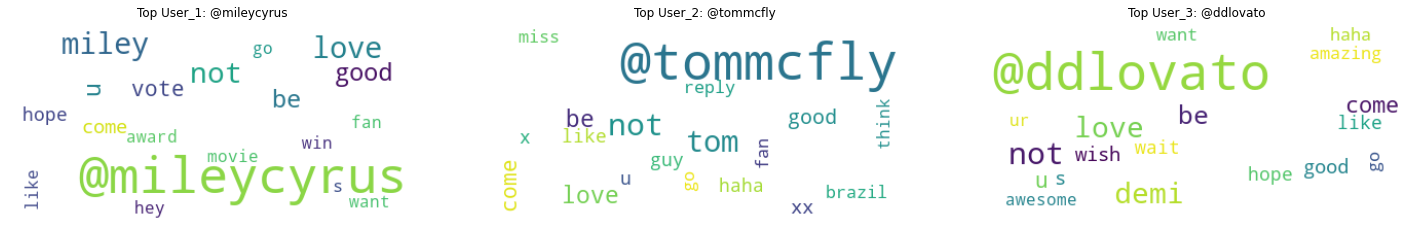

In [27]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 25))
topWords = [topWords1, topWords2, topWords3]
for i in range(0, len(topWords)):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(topWords[i].to_dict())
  axs[i].imshow(wordcloud, interpolation="bilinear")
  axs[i].set_title('Top User_{}: {}'.format(i+1, top_users[i]))
  axs[i].axis('off')

plt.show()

**Conclusiones**



1.   El usuario más citado en los tweets es **Miley Cyrus**, cuyo contexto engloba el aprecio de los fans y sus premiaciones de películas
2.   El segundo usuario más citado es **Tom Mcfly** con un contexto de aprecio de los fans, su gusto, y demás
3.   El tercer usuario más citado es **Demi Lovato**, nuevamente con un contexto de aprecio de los fans, y buenos deseos

